#### Check `tf.version` 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


### Import the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#### Each image is mapped to a single lable. Since the _class names_ are not included with dataset, store them here to use later when plotting the images 

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

### Preprocess the data

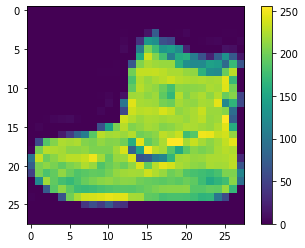

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### Scale values to a range of (0, 1)

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

#### Verify the data is in the correct format. Display the first 25 images from _training set_ and disply the class name below each image

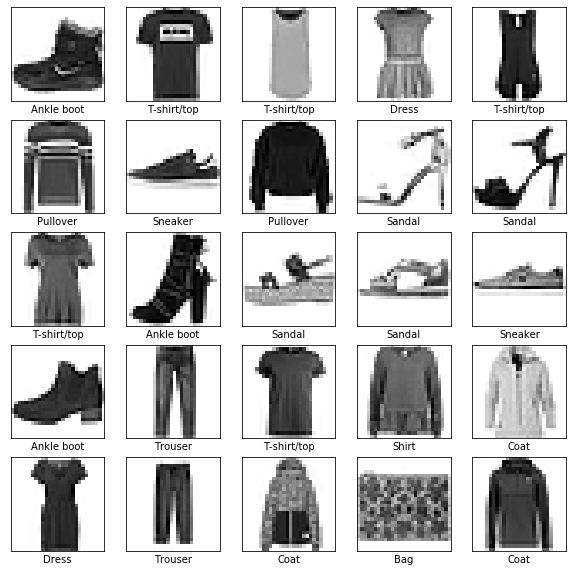

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

#### Set up the layers: `Flatten`, `Dense` 

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### Complie the model

In [19]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


# Loss function 
# - measure how accurate the model is during training. 
# - you want to minimize this function to "steer" then model in the right direction

# Opimizer 
# - how the model is updated based on the data it sees and its loss function 

# Metrics 
# - used to monitor training and testing steps

### Train the model

In [20]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4912 - accuracy: 0.8272
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3715 - accuracy: 0.8666
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3337 - accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3087 - accuracy: 0.8869
Epoch 5/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2924 - accuracy: 0.8926
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2775 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2662 - accuracy: 0.9023
Epoch 8/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2552 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2447 - accuracy: 0.9095
Epoch 10/10
60

### Evaluate accuracy: _compare how the model performs on the test dataset_

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2766 - accuracy: 0.8860

Test accuracy: 0.886


### Make predictions

In [22]:
predictions = model.predict(test_images)
predictions[0]

array([5.1481088e-08, 5.5909029e-09, 4.1531822e-09, 1.7630658e-08,
       1.6772830e-08, 4.6495260e-03, 4.4938440e-07, 1.0260182e-02,
       5.4982330e-09, 9.8508978e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

#### Graph this to look at the full set of 10 class predictions

In [28]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)  # np.argmax = find the index
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

#### Look at the _0th_ image, predictions and predition array  
- Correct prediction labels are blue whilst incorrect prediction labels are red  
- The number gives the % for the predicted label 

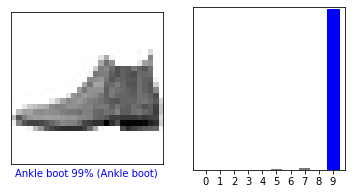

In [29]:
i = 0 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

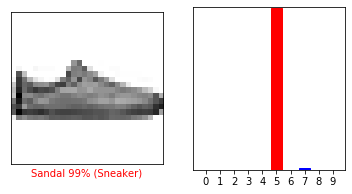

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

#### Let's plot several images with their predictions. _Note that the model can be wrong even when very confident_

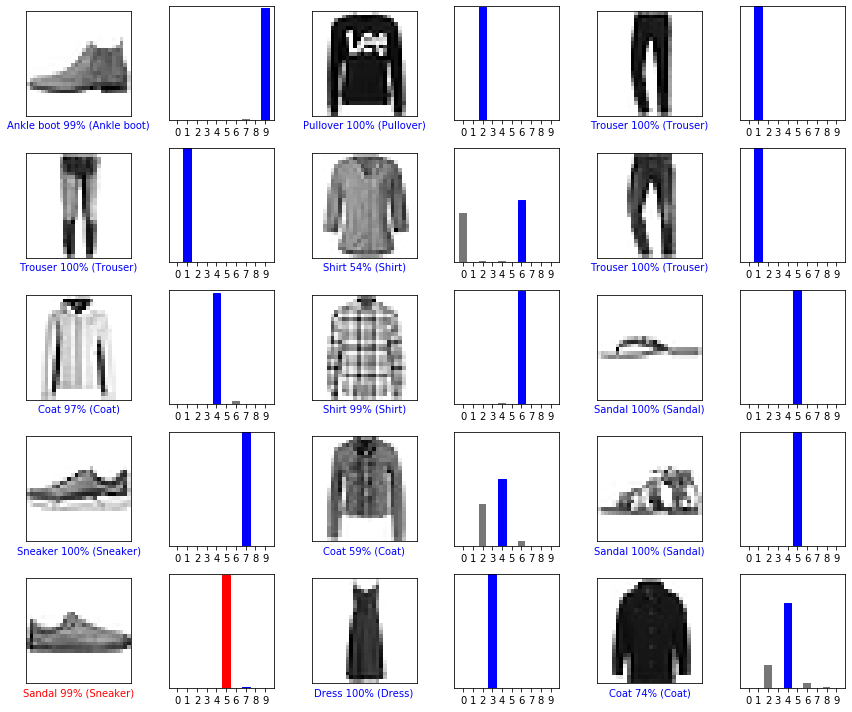

In [37]:
# Plot the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue, whilst incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### Use trained model to make a prediction about a single image

In [38]:
# Grab an image from test dataset

img = test_images[1]

print(img.shape)

(28, 28)


#### `tf.keras` models are optimized to make predictions on a _batch or collection_ of examples at once. So you need to add it to a list

In [39]:
# Add the image to a batch where it is the only member

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


#### Predict the corrent label for this image

In [40]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.3185911e-04 8.1248634e-14 9.9846542e-01 6.9878114e-12 3.4580869e-04
  2.5595215e-16 6.5690960e-04 7.5611554e-21 7.0203711e-11 1.6662743e-17]]


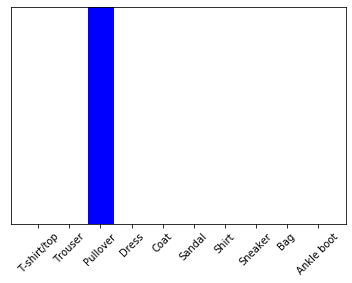

In [43]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

#### `model.predict` returns a list of lists, which means _one list for each image in the batch of data_ So grab the predictions for only our image in the batch 

In [45]:
np.argmax(predictions_single[0])

# Model predicts a label as expected (??)

2

end -

##### Reference 
https://www.tensorflow.org/tutorials/keras/classification